# IMDb Neural Networks

In this project, we will convolutional neural networks and recurrent neural networks for the purpose of sentiment analysis on the IMDb dataset.

# Convolutional Neural Networks (CNNs)

We first consider convolutional neural networks.  

In [16]:
#  Package import

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Embedding, AveragePooling1D, GlobalMaxPooling1D, Flatten, MaxPooling1D, GRU, LSTM, SimpleRNN, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pickle

In [2]:
# Data import

(x_train, y_train), (x_test, y_test) = imdb.load_data()

vocab_size = 10000
maxLen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imbd.npz",
                                                      num_words=vocab_size,
                                                      skip_top=0,
                                                      maxlen=maxLen,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

x_train = sequence.pad_sequences(x_train, maxlen=maxLen)
x_test = sequence.pad_sequences(x_test, maxlen=maxLen)

17464789/17464789 [==============================] - 0s 0us/step


In the cell below, we explore various CNN architectures.

In [5]:
cnn_structures = []

# Section 1:  Conv/Pool architectures with no fully connected network after flatten
cnn_1 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(1,activation='sigmoid')]

cnn_2 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(1,activation='sigmoid')]

cnn_3 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(1,activation='sigmoid')]

# Section 2:  Previous Architectures with convolution before flatten
cnn_4 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         Flatten(),
         Dense(1,activation='sigmoid')]

cnn_5 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         Flatten(),
         Dense(1,activation='sigmoid')]

cnn_6 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(800, 3, activation='relu'),
         Flatten(),
         Dense(1,activation='sigmoid')]

#  Section 3:  Section 2 archs. with 3 convolutions before flatten
cnn_7 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         Conv1D(200, 3, activation='relu'),
         Conv1D(200, 3, activation='relu'),
         Flatten(),
         Dense(1,activation='sigmoid')]

cnn_8 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         Conv1D(400, 3, activation='relu'),
         Conv1D(400, 3, activation='relu'),
         Flatten(),
         Dense(1,activation='sigmoid')]

cnn_9 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(800, 3, activation='relu'),
         Conv1D(800, 3, activation='relu'),
         Conv1D(800, 3, activation='relu'),
         Flatten(),
         Dense(1,activation='sigmoid')]

#
# Section 4:  Sections 1,2,3 archs with a single dense layer before output layer
#
cnn_10 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_11 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_12 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_13 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_14 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_15 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(800, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_16 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         Conv1D(200, 3, activation='relu'),
         Conv1D(200, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_17 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         Conv1D(400, 3, activation='relu'),
         Conv1D(400, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_18 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(800, 3, activation='relu'),
         Conv1D(800, 3, activation='relu'),
         Conv1D(800, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

#
# Section 5:  Section 4 archs with 2 dense layers before output layer
#
cnn_19 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_20 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_21 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_22 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_23 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_24 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(800, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_25 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         Conv1D(200, 3, activation='relu'),
         Conv1D(200, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_26 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         Conv1D(400, 3, activation='relu'),
         Conv1D(400, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]

cnn_27 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
         Conv1D(100, 7, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(200, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(400, 3, activation='relu'),
         MaxPooling1D(pool_size=2),
         Conv1D(800, 3, activation='relu'),
         Conv1D(800, 3, activation='relu'),
         Conv1D(800, 3, activation='relu'),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(100, activation='relu'),
         Dense(1,activation='sigmoid')]


cnn_structures.append(cnn_1)
cnn_structures.append(cnn_2)
cnn_structures.append(cnn_3)
cnn_structures.append(cnn_4)
cnn_structures.append(cnn_5)
cnn_structures.append(cnn_6)
cnn_structures.append(cnn_7)
cnn_structures.append(cnn_8)
cnn_structures.append(cnn_9)
cnn_structures.append(cnn_10)
cnn_structures.append(cnn_11)
cnn_structures.append(cnn_12)
cnn_structures.append(cnn_13)
cnn_structures.append(cnn_14)
cnn_structures.append(cnn_15)
cnn_structures.append(cnn_16)
cnn_structures.append(cnn_17)
cnn_structures.append(cnn_18)
cnn_structures.append(cnn_19)
cnn_structures.append(cnn_20)
cnn_structures.append(cnn_21)
cnn_structures.append(cnn_22)
cnn_structures.append(cnn_23)
cnn_structures.append(cnn_24)
cnn_structures.append(cnn_25)
cnn_structures.append(cnn_26)
cnn_structures.append(cnn_27)

Below tests each of the architectures listed above for performance.  We can then decide on which architecture is the best for us.

In [6]:
histories = []
current_arch = 1

# Uncomment for specific arch. testing
cnn_structures = [cnn_22]

for arch in cnn_structures:
    print(f"Architecture {current_arch}:")
    model_cnn = Sequential(arch)
    opt = Adam()
    model_cnn.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
    
    history_cnn = model_cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))
    histories.append(history_cnn.history)
    current_arch = current_arch + 1
    
# fileObj = open('history_dicts.obj', 'wb')
# pickle.dump(histories,fileObj)
# fileObj.close()    

Architecture 1:
Epoch 1/20
716/716 [==============================] - 17s 15ms/step - loss: 0.3450 - accuracy: 0.8361 - val_loss: 0.2595 - val_accuracy: 0.8930
Epoch 2/20
716/716 [==============================] - 11s 15ms/step - loss: 0.1614 - accuracy: 0.9382 - val_loss: 0.2769 - val_accuracy: 0.8906
Epoch 3/20
716/716 [==============================] - 13s 18ms/step - loss: 0.0795 - accuracy: 0.9713 - val_loss: 0.4158 - val_accuracy: 0.8748
Epoch 4/20
716/716 [==============================] - 11s 15ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.5629 - val_accuracy: 0.8722
Epoch 5/20
712/716 [============================>.] - ETA: 0s - loss: 0.0275 - accuracy: 0.9904

KeyboardInterrupt: 

The cell below plots the loss functions and training/test accuracies specifically for Architecture 22, the architecture used for the final model.

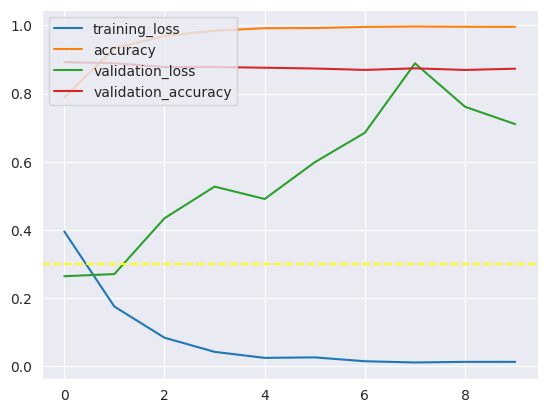

In [81]:
arch = 22

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
plt.plot(history_df.iloc[arch-1,0], label='training_loss')             # training_loss
plt.plot(history_df.iloc[arch-1,1], label='accuracy')                  # accuracy
plt.plot(history_df.iloc[arch-1,2], label='validation_loss')           # validation_loss
plt.plot(history_df.iloc[arch-1,3], label='validation_accuracy')       # validation_accuracy
plt.axhline(y=0.3, color='yellow', linestyle='--')
plt.legend(loc="upper left")
plt.show()

The following cell compiles the final CNN after modifications.

In [77]:
model1 = Sequential([
    
    # Selected unmodified architecture from prior testing:
    # cnn_22 = [Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
    #      Conv1D(100, 7, activation='relu'),
    #      MaxPooling1D(pool_size=2),
    #      Conv1D(200, 3, activation='relu'),
    #      Flatten(),
    #      Dense(100, activation='relu'),
    #      Dense(100, activation='relu'),
    #      Dense(1,activation='sigmoid')]
    
    # Embedding
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
    
    # Convolution Portion
    Conv1D(100, 7, activation='relu'),# kernel_regularizer='l1'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(200, 3, activation='relu'),
    
    
    Flatten(),
    
    # Fully connected Portion
    Dense(15, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='relu'),
    Dense(1,activation='sigmoid')])

# Optimization algorithm and model compilation
opt = Adam(learning_rate=0.000005)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

In [78]:
model1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Embedding)           (None, 500, 128)          1280000   
                                                                 
 conv1d_238 (Conv1D)         (None, 494, 100)          89700     
                                                                 
 max_pooling1d_137 (MaxPooli  (None, 247, 100)         0         
 ng1D)                                                           
                                                                 
 conv1d_239 (Conv1D)         (None, 245, 200)          60200     
                                                                 
 flatten_83 (Flatten)        (None, 49000)             0         
                                                                 
 dense_193 (Dense)           (None, 15)                735015    
                                                     

In [79]:
history1 = model1.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_test, y_test))
#history1 = model1.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/10
5721/5721 [==============================] - 57s 10ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 2/10
5721/5721 [==============================] - 57s 10ms/step - loss: 0.6926 - accuracy: 0.5172 - val_loss: 0.6927 - val_accuracy: 0.5132
Epoch 3/10
5721/5721 [==============================] - 60s 10ms/step - loss: 0.6915 - accuracy: 0.5280 - val_loss: 0.6914 - val_accuracy: 0.5240
Epoch 4/10
5721/5721 [==============================] - 57s 10ms/step - loss: 0.6844 - accuracy: 0.5739 - val_loss: 0.6718 - val_accuracy: 0.6572
Epoch 5/10
5721/5721 [==============================] - 58s 10ms/step - loss: 0.6302 - accuracy: 0.6768 - val_loss: 0.5586 - val_accuracy: 0.7599
Epoch 6/10
5721/5721 [==============================] - 58s 10ms/step - loss: 0.5045 - accuracy: 0.7658 - val_loss: 0.4274 - val_accuracy: 0.8223
Epoch 7/10
5721/5721 [==============================] - 59s 10ms/step - loss: 0.4137 - accuracy: 0.8123 - val_loss: 0.3708 -

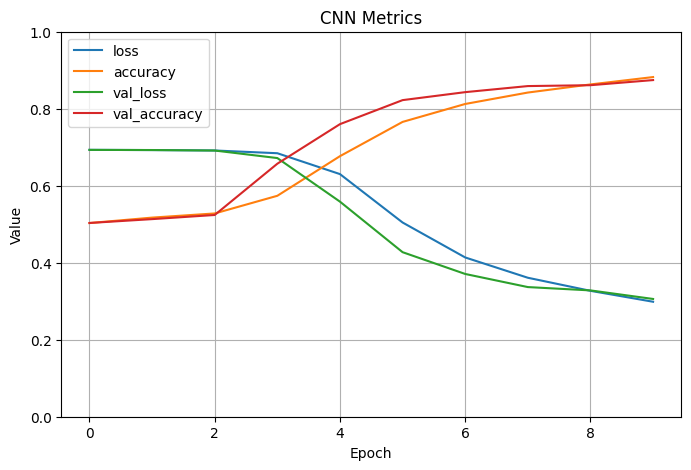

In [80]:
fig = pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.title("CNN Metrics")
plt.show()

In [ ]:
model1.save("imdb_CNN_1.keras")
fileObj = open('history1_1.obj', 'wb')
pickle.dump(history1,fileObj)
fileObj.close()

# Recurrent Neural Networks (RNNs)

This portion of the notebook plays with RNNs.

In [9]:
# Data Import

(x_train, y_train), (x_test, y_test) = imdb.load_data()

vocab_size = 10000
maxLen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imbd.npz",
                                                      num_words=vocab_size,
                                                      skip_top=0,
                                                      maxlen=maxLen,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

x_train = sequence.pad_sequences(x_train, maxlen=maxLen)#, maxlen=maxLen)  # maxLen)
x_test = sequence.pad_sequences(x_test, maxlen=maxLen)#, maxlen=maxLen)    # maxLen)

In the cell below, we implement a function that will allow us to perform random search for hyperparameters in our given architecture.

In [3]:
import random

initializers = ['constant', 'glorot_normal', 'glorot_uniform', 'he_normal',
                'he_uniform','identity', 'lecun_normal', 'lecun_uniform', 
                'ones', 'orthogonal', 'random_normal', 'random_uniform',
                'truncated_normal', 'variance_scaling', 'zeros']

regularizers = [None,'l1','l2']

constraints = [None,'max_norm','min_max_norm','non_neg', 'unit_norm']

def random_rnn_config(initializer, regularizers, constraints):
    size = random.choice([16,32,64,128,256])
    ki1 = random.choice(initializers)
    ri1 = random.choice(initializers)
    bi1 = random.choice(initializers)
    kr1 = random.choice(regularizers)
    rr1 = random.choice(regularizers)
    br1 = random.choice(regularizers)
    ar1 = random.choice(regularizers)
    kc1 = random.choice(constraints)
    bc1 = random.choice(constraints)
    do1 = random.choice([0.0, np.random.uniform(0.0,0.8)])
    ki2 = random.choice(initializers)
    ri2 = random.choice(initializers)
    bi2 = random.choice(initializers)
    kr2 = random.choice(regularizers)
    rr2 = random.choice(regularizers)
    br2 = random.choice(regularizers)
    ar2 = random.choice(regularizers)
    kc2 = random.choice(constraints)
    bc2 = random.choice(constraints)
    do2 = random.choice([0.0, np.random.uniform(0.0,0.8)])

    return [size, ki1, ri1, bi1, kr1, rr1, br1, ar1, kc1, bc1, do1,
            ki2, ri2, bi2, kr2, rr2, br2, ar2, kc2, bc2, do2]
    

In [92]:
configurations_rnn = []
histories_rnn = []

for i in range(1):
    # Change argument in range >1 if random search desired
    
    # For random search
    # config = random_rnn_config(initializers, regularizers, constraints)
    # print(config)
    # configurations_rnn.append(config)
    
    # For specific test
    config = [32, 'truncated_normal', 'identity', 'lecun_normal', 'l2', 'l2', 'l1', 'l2', 'unit_norm', 'non_neg', 0.4032530557603061, 'zeros', 'random_uniform', 'random_normal', 'l2', 'l2', 'l2', 'l2', 'min_max_norm', None, 0.4061613404389912]
    
    model_rnn = Sequential([
        Embedding(vocab_size, config[0], input_shape=(maxLen,)),

        # First GRU
        GRU(config[0], 
            return_sequences=True, 
            activation='tanh',
            kernel_initializer=config[1],
            recurrent_initializer=config[2],
            bias_initializer=config[3],
            kernel_regularizer=config[4],
            recurrent_regularizer=config[5],
            bias_regularizer=config[6],
            activity_regularizer=config[7],
            kernel_constraint=config[8],
            bias_constraint=config[9],
            dropout=config[10],
            ),

        # Second GRU
        GRU(config[0],
            activation='tanh',
            kernel_initializer=config[11],
            recurrent_initializer=config[12],
            bias_initializer=config[13],
            kernel_regularizer=config[14],
            recurrent_regularizer=config[15],
            bias_regularizer=config[16],
            activity_regularizer=config[17],
            kernel_constraint=config[18],
            bias_constraint=config[19],
            dropout=config[20],
            ),

        # Output
        Dense(1, activation="sigmoid")
    ])

    opt = Adam(learning_rate=0.0001)
    model_rnn.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
    history_rnn = model_rnn.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_test, y_test))
    histories_rnn.append(history_rnn.history)
    
# Save Configurations
# fileObj = open('configurations_rnn.obj', 'wb')
# pickle.dump(configurations_rnn,fileObj)
# fileObj.close()    

# Save History Dicts
# fileObj = open('history_rnn_dicts.obj', 'wb')
# pickle.dump(histories_rnn,fileObj)
# fileObj.close()    

Epoch 1/40
716/716 [==============================] - 49s 63ms/step - loss: 24.4936 - accuracy: 0.4967 - val_loss: 13.8992 - val_accuracy: 0.5026
Epoch 2/40
716/716 [==============================] - 45s 63ms/step - loss: 8.8224 - accuracy: 0.4999 - val_loss: 5.2921 - val_accuracy: 0.5026
Epoch 3/40
716/716 [==============================] - 45s 63ms/step - loss: 4.4081 - accuracy: 0.5044 - val_loss: 3.2512 - val_accuracy: 0.5026
Epoch 4/40
716/716 [==============================] - 43s 60ms/step - loss: 3.3394 - accuracy: 0.5045 - val_loss: 2.7154 - val_accuracy: 0.5026
Epoch 5/40
716/716 [==============================] - 45s 63ms/step - loss: 3.0009 - accuracy: 0.5040 - val_loss: 2.5372 - val_accuracy: 0.5026
Epoch 6/40
716/716 [==============================] - 45s 63ms/step - loss: 2.8414 - accuracy: 0.5069 - val_loss: 2.4443 - val_accuracy: 0.5475
Epoch 7/40
716/716 [==============================] - 44s 62ms/step - loss: 2.7318 - accuracy: 0.5099 - val_loss: 2.3686 - val_accurac

In [17]:
    history_rnn = model_rnn.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))
    histories_rnn.append(history_rnn.history)

Epoch 1/15
716/716 [==============================] - 38s 53ms/step - loss: 1.8291 - accuracy: 0.8773 - val_loss: 1.6463 - val_accuracy: 0.8556
Epoch 2/15
716/716 [==============================] - 40s 56ms/step - loss: 1.8009 - accuracy: 0.8841 - val_loss: 1.6036 - val_accuracy: 0.8756
Epoch 3/15
716/716 [==============================] - 41s 57ms/step - loss: 1.7794 - accuracy: 0.8904 - val_loss: 1.6530 - val_accuracy: 0.8403
Epoch 4/15
716/716 [==============================] - 40s 56ms/step - loss: 1.7601 - accuracy: 0.8936 - val_loss: 1.6980 - val_accuracy: 0.8187
Epoch 5/15
716/716 [==============================] - 43s 60ms/step - loss: 1.7377 - accuracy: 0.8996 - val_loss: 1.6151 - val_accuracy: 0.8488
Epoch 6/15
716/716 [==============================] - 40s 56ms/step - loss: 1.7225 - accuracy: 0.9020 - val_loss: 1.6908 - val_accuracy: 0.8115
Epoch 7/15
716/716 [==============================] - 42s 59ms/step - loss: 1.7068 - accuracy: 0.9045 - val_loss: 1.6333 - val_accuracy:

None of the parameter sets generated did better than our sample model.  We now try to manually improve on the model that we began with.

In [87]:
configurations_rnn = []
histories_rnn = []

for i in range(1):
    # Change range for random search
    
    # For random search
    # config = random_rnn_config(initializers, regularizers, constraints)
    
    # print(config)
    # configurations_rnn.append(config)
    
    # For specific test
    #config = [32, 'truncated_normal', 'identity', 'lecun_normal', 'l2', 'l2', 'l1', 'l2', 'unit_norm', 'non_neg', 0.4032530557603061, 'zeros', 'random_uniform', 'random_normal', 'l2', 'l2', 'l2', 'l2', 'min_max_norm', None, 0.4061613404389912]
    
    model_rnn = Sequential([
        Embedding(vocab_size, 32, input_shape=(maxLen,)),

        # First GRU
        GRU(32, 
            return_sequences=True, 
            ),

        # Second GRU
        GRU(32),

        # Output
        Dense(1, activation="sigmoid")
    ])

    opt = Adam(learning_rate=0.00001)
    model_rnn.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
    history_rnn = model_rnn.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
    histories_rnn.append(history_rnn.history)

Epoch 1/10
716/716 [==============================] - 54s 70ms/step - loss: 0.6929 - accuracy: 0.5258 - val_loss: 0.6926 - val_accuracy: 0.5452
Epoch 2/10
716/716 [==============================] - 43s 60ms/step - loss: 0.6922 - accuracy: 0.5635 - val_loss: 0.6919 - val_accuracy: 0.5814
Epoch 3/10
716/716 [==============================] - 43s 60ms/step - loss: 0.6911 - accuracy: 0.5960 - val_loss: 0.6905 - val_accuracy: 0.6070
Epoch 4/10
716/716 [==============================] - 41s 57ms/step - loss: 0.6888 - accuracy: 0.6329 - val_loss: 0.6873 - val_accuracy: 0.6297
Epoch 5/10
716/716 [==============================] - 43s 60ms/step - loss: 0.6828 - accuracy: 0.6582 - val_loss: 0.6786 - val_accuracy: 0.6544
Epoch 6/10
716/716 [==============================] - 44s 61ms/step - loss: 0.6633 - accuracy: 0.6877 - val_loss: 0.6460 - val_accuracy: 0.6799
Epoch 7/10
716/716 [==============================] - 42s 58ms/step - loss: 0.5866 - accuracy: 0.7193 - val_loss: 0.5371 - val_accuracy:

In [83]:
model_rnn.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru_2 (GRU)                 (None, 500, 32)           6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_197 (Dense)           (None, 1)                 33        
                                                                 
Total params: 332,705
Trainable params: 332,705
Non-trainable params: 0
_________________________________________________________________


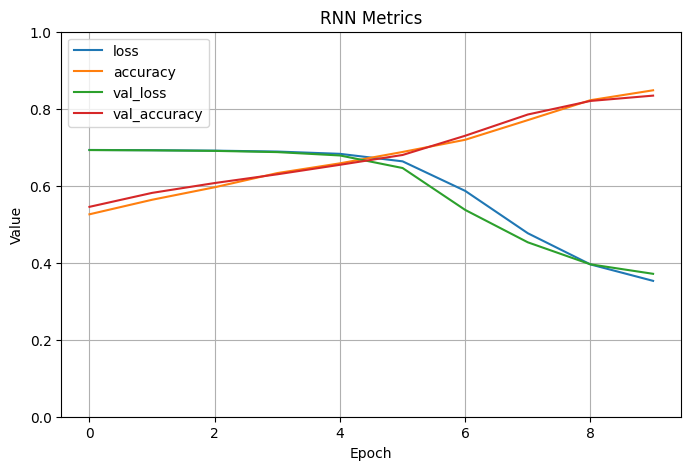

In [89]:
fig = pd.DataFrame(history_rnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.title("RNN Metrics")
plt.show()

In [69]:
model2.save("imdb_RNN_1.keras")
fileObj = open('history2.obj', 'wb')
pickle.dump(history2,fileObj)
fileObj.close()

INFO:tensorflow:Assets written to: ram://643dfdb1-5427-4491-a4c6-a431898a2837/assets


INFO:tensorflow:Assets written to: ram://643dfdb1-5427-4491-a4c6-a431898a2837/assets
